<a href="https://colab.research.google.com/github/fmlopezguzman/stochastic-simulation-algorithm-visualizations/blob/main/Gillespie1976.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En la primera sección (Stochastic Simulation Algorithm) se definen las funciones del algoritmo; en las otras secciones se ejecutan los ejemplos.

Los parámetros en los ejemplos son:
*   `XX` = vector con valores iniciales X1, X2, Y1, Y2, etc., en el orden que esté indicado en cada ejemplo.
*   `cc` = vector con parámetros c1, c2, etc., ordenados.
*   `hh` = vector con parámetros que multiplican a cada componente del vector XX para cada reacción (e.g. para la primera reacción, el vector es [1,0] porque h1=X, con XX = [X,Z]).
*   `RR` = diccionario con parámetros de cuántas unidades se agregan a cada elemento en cada reacción (e.g. en la primera reacción, la única reacción posible es que un X se transforme en un Z, o sea RR[1]=[-1,1] con XX=[X,Z]). En las reacción que tienen un elemento infinito (e.g. X techo) hay que poner un 0 para ese elemento en todas las reacciones.

También se pueden cambiar el tiempo máximo t_max y el número máximo de reacciones n_max.

La salida de la función stochastic_simulation_algorithm es un dataframe de pandas X (parecido a una matriz) donde cada columna es uno de los elementos X1, X2, etc. y cada fila es un tiempo en el que ocurre una reacción.

## Stochastic Simulation Algorithm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math

In [ ]:
def get_h_array(X_list, h_list):  # Eq. 15
    h_array = np.zeros(len(h_list))
    for idh in range(len(h_list)):
        h = 1
        for idx in range(len(X_list)):
            if h_list[idh][idx] == 1:
                h *= X_list[idx]
            elif h_list[idh][idx] >= 2:
                h *= get_h_factorial(h_list[idh][idx], X_list[idx])
        h_array[idh] = h
    
    return h_array

# Esta función calcula los valores h_nu en función de los valores
# actuales de cada X_nu y de los parámetros hh para cada reacción

In [ ]:
def get_h_factorial(h,x):
    return math.factorial(x) / (math.factorial(x-h) * math.factorial(h))

In [ ]:
def random_numbers(a_array): # Eq. 21
    a0 = np.sum(a_array)
    a_norm = np.cumsum(a_array) / a0

    r1 = random.random()
    tau = 1/a0 * np.log(1/r1)

    r2 = random.random()
    mu = np.argwhere(a_norm > r2)[0][0] + 1

    return tau, mu, a0

# Esta función calcula tau y mu a partir de dos números aleatorios r1 y r2

In [ ]:
def stochastic_simulation_algorithm(
    X_list, c_array, h_list, R_dict, t_max=1000, n_max=1000):   # Fig. 2
    
    # Step 0:
    t = 0
    n = 0
    a0 = 1000
    X = dict()

    while (t<=t_max) & (n<=n_max) & (a0>1):
        # Step 1:
        h_array = get_h_array(X_list, h_list)
        a_array = h_array * c_array

        # Step 2:
        tau, mu, a0 = random_numbers(a_array)

        # Step 3:
        t += tau
        X_list = [sum(i) for i in zip(X_list, R_dict[mu])]
        n += 1

        X[t] = X_list

    return X

## Irreversible isomerization reaction (Eq. 22)

In [ ]:
XX = [1000, 0]          # [X, Z]
cc = np.array([.5])     # c
hh = [[1, 0]]           # h1 = X
RR = {1:[-1,1]}         # X -> X-1, Z -> Z+1

In [ ]:
X = stochastic_simulation_algorithm(XX, cc, hh, RR)
X = pd.DataFrame.from_dict(X, orient='index')
X.columns = ['X', 'Z']
X.to_csv('irreversible_isomerization_1.csv')

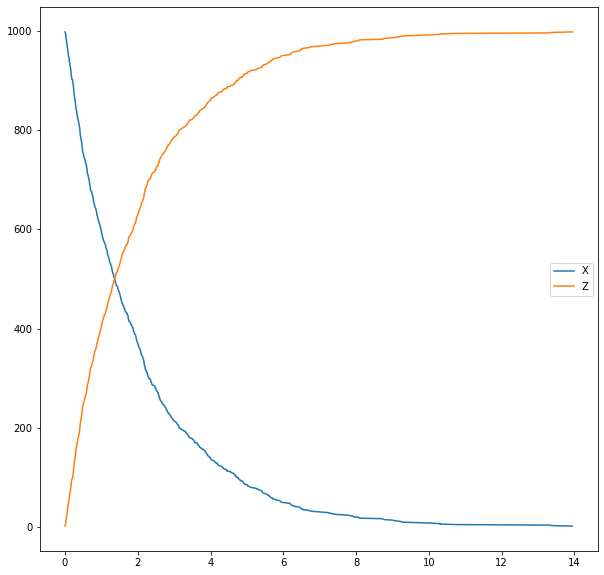

In [ ]:
plt.subplots(figsize=(10,10))
plt.plot(X)
plt.legend(['X','Z'])

## (Eq. 29)

In [ ]:
XX = [1000, 10, 0]              # [X, Y, Z]
cc = np.array([5/XX[0],.005])   # [c1, c2]
hh = [[1,1,0], [0,2,0]]         # h1 = XY; h2 = Y(Y-1)/2
RR = {1:[0,1,0], 2:[0,-2,1]}    # X->X, Y->Y+1, Z->Z ó X->X, Y->Y-2, Z->Z+1

In [ ]:
X = stochastic_simulation_algorithm(
    XX, cc, hh, RR, t_max=50000, n_max=50000)
X = pd.DataFrame.from_dict(X, orient='index')
X.columns = ['X','Y','Z']
Y_10 = X['Y'].values

In [ ]:
XX = [1000, 3000, 0]            # Lo mismo que antes pero con un valor inicial Yo diferente
cc = np.array([5/XX[0],.005])
hh = [[1,1,0], [0,2,0]]
RR = {1:[0,1,0], 2:[0,-2,1]}

In [ ]:
X = stochastic_simulation_algorithm(
    XX, cc, hh, RR, t_max=50000, n_max=50000)
X = pd.DataFrame.from_dict(X, orient='index')
X.columns = ['X','Y','Z']
X.to_csv('irreversible_isomerization_2.csv')
Y_3000 = X['Y'].values

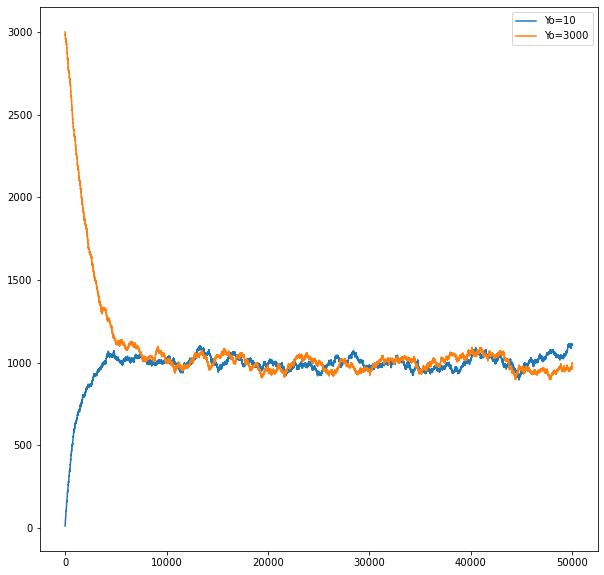

In [ ]:
plt.subplots(figsize=(10,10))
plt.plot(Y_10, label='Yo=10')
plt.plot(Y_3000, label='Yo=3000')
plt.legend()

## Lotka (Eq. 38)

In [ ]:
XX = [1000, 1000, 1000, 0]                      # [X, Y1, Y2, Z]
cc = np.array([10/XX[0], .01, 10])
hh = [[1,1,0,0], [0,1,1,0], [0,0,1,0]]
RR = {1:[0,1,0,0], 2:[0,-1,1,0], 3:[0,0,-1,1]}

In [ ]:
X = stochastic_simulation_algorithm(
    XX, cc, hh, RR, t_max=1000000, n_max=500000)
X = pd.DataFrame.from_dict(X, orient='index')
X.columns = ['X','Y1','Y2','Z']
X.to_csv('lotka_1.csv')

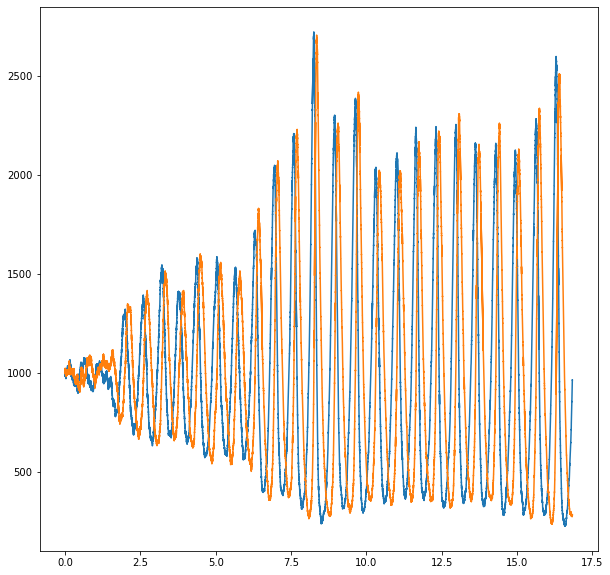

In [ ]:
plt.subplots(figsize=(10,10))
plt.plot(X[['Y1','Y2']])

In [ ]:
XX = [10**5, 1000, 1000, 0]                     # [X, Y1, Y2, Z]
cc = np.array([0.0001, .01, 10])
hh = [[1,1,0,0], [0,1,1,0], [0,0,1,0]]
RR = {1:[-1,1,0,0], 2:[0,-1,1,0], 3:[0,0,-1,1]}

In [ ]:
X = stochastic_simulation_algorithm(
    XX, cc, hh, RR, t_max=200000, n_max=250000)
X = pd.DataFrame.from_dict(X, orient='index')
X.columns = ['X','Y1','Y2','Z']
X.to_csv('lotka_2.csv')

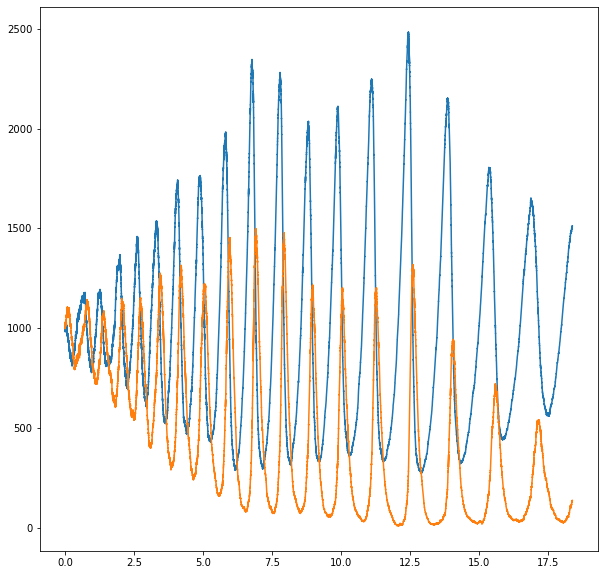

In [ ]:
plt.subplots(figsize=(10,10))
plt.plot(X[['Y1','Y2']])

## Brusselator (Eq. 44)

In [ ]:
XX = [50000,50000,1000, 2000, 0, 0]                  # [X1. X2, Y1, Y2, Z1, Z2]
cc = np.array([5000/XX[0], 50/XX[1], .00005, 5])
hh = [[1,0,0,0,0,0], [0,1,1,0,0,0], [0,0,2,1,0,0], [0,0,1,0,0,0]]
RR = {1:[0,0,1,0,0,0], 2:[0,0,-1,1,1,0], 3:[0,0,1,-1,0,0], 4:[0,0,-1,0,0,1]}

In [ ]:
X = stochastic_simulation_algorithm(
    XX, cc, hh, RR, t_max=20000000, n_max=1000000)
X = pd.DataFrame.from_dict(X, orient='index')
X.columns = ['X1','X2','Y1','Y2','Z1','Z2']
X.to_csv('brusselator.csv')

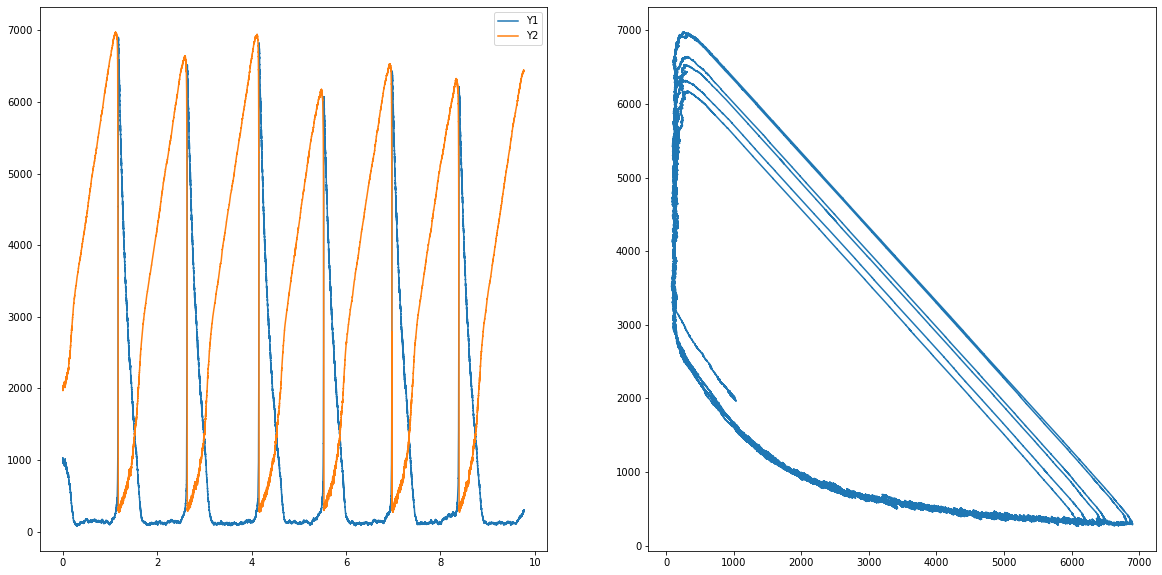

In [ ]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(20,10))
ax1.plot(X[['Y1','Y2']])
ax1.legend(['Y1','Y2'])
ax2.plot(X['Y1'],X['Y2'])

## Oregonator (Eq. 59)

In [ ]:
XX = [10**5,10**5,10**5,2000,4000,8000,0,0]     # [X1, X2, X3, Y1, Y2, Y3, Z1, Z2]
cc_aux = [2000,4000,8000,2000,20000] # [Y1s, Y2s, Y3s, p1s, p2s]
cc = np.array([
    cc_aux[3]/(cc_aux[1]*XX[0]),
    cc_aux[4]/(cc_aux[0]*cc_aux[1]),
    (cc_aux[3]+cc_aux[4])/(cc_aux[0]*XX[1]),
    2*cc_aux[3]/(cc_aux[0]**2),
    (cc_aux[3]+cc_aux[4])/(cc_aux[2]*XX[2])])
hh = [[1,0,0,0,1,0,0,0], [0,0,0,1,1,0,0,0], [0,1,0,1,0,0,0,0],
          [0,0,0,2,0,0,0,0], [0,0,1,0,0,1,0,0]]
RR = {1:[0,0,0,1,-1,0,0,0], 2:[0,0,0,-1,-1,0,1,0], 3:[0,0,0,1,0,1,0,0],
          4:[0,0,0,-2,0,0,0,1], 5:[0,0,0,0,1,-1,0,0]}

In [ ]:
X = stochastic_simulation_algorithm(
    XX, cc, hh, RR, t_max=2000000, n_max=2000000)
X = pd.DataFrame.from_dict(X, orient='index')
X.columns = ['X1','X2','X3','Y1','Y2','Y3','Z1','Z2']
X.to_csv('oregonator.csv')

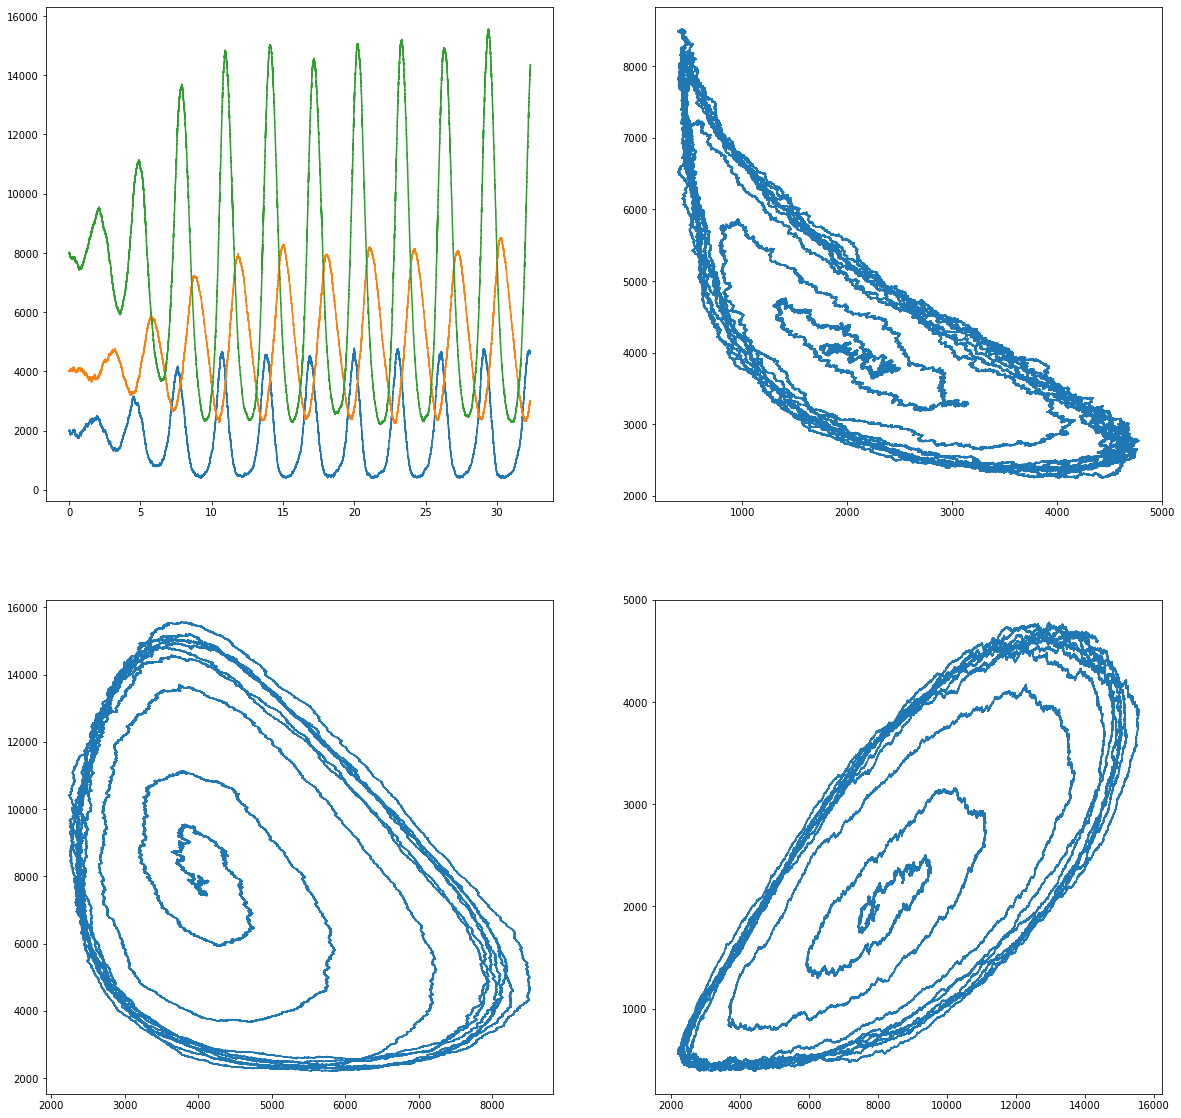

In [ ]:
fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(2,2, figsize=(20,20))
ax1.plot(X[['Y1','Y2','Y3']])
ax2.plot(X['Y1'],X['Y2'])
ax3.plot(X['Y2'],X['Y3'])
ax4.plot(X['Y3'],X['Y1'])